In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('macosx')
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams.update({
    'font.family': 'Arial'
})
import os
import shutil
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats


pd.set_option('display.max_columns', 500)

import sys
sys.path.append('/Users/bns631/Work/Calcium_imaging/CA_pipeline_2025/napari_scripts')

import plot as plot  
import utils as utils  





In [2]:
# Read the data frames
active_cells_df = pd.read_pickle('/Volumes/T9/Ca_data/exp_pharmacology/Analysis_new_env/Quantification/Tables/active_cells_per_biological_replicate.pkl')
cell_properties_df = pd.read_pickle('/Volumes/T9/Ca_data/exp_pharmacology/Analysis_new_env/Quantification/Tables/cell_properties_spontaneous.pkl')
colors = pd.read_csv('/Volumes/T9/Ca_data/exp_pharmacology/Analysis_new_env/colors.csv', sep=None)

# GEnerate palette
palette = dict(cell_properties_df[['stimulation','colors']].drop_duplicates().values.tolist())
palette

{'Control': '#1c1fb0',
 '4AP': '#7526a9',
 'PTX': '#b84295',
 'GABA': '#e4746d',
 'TTX': '#fca02b'}

In [3]:
# Removing outlier cells

max_dff = []
for i, row in cell_properties_df.iterrows():
    max_dff.append(np.max(row['dff']))

cell_properties_df['max_dff'] = max_dff

cell_properties_df = cell_properties_df[cell_properties_df.max_dff < 5]

# Heatmap

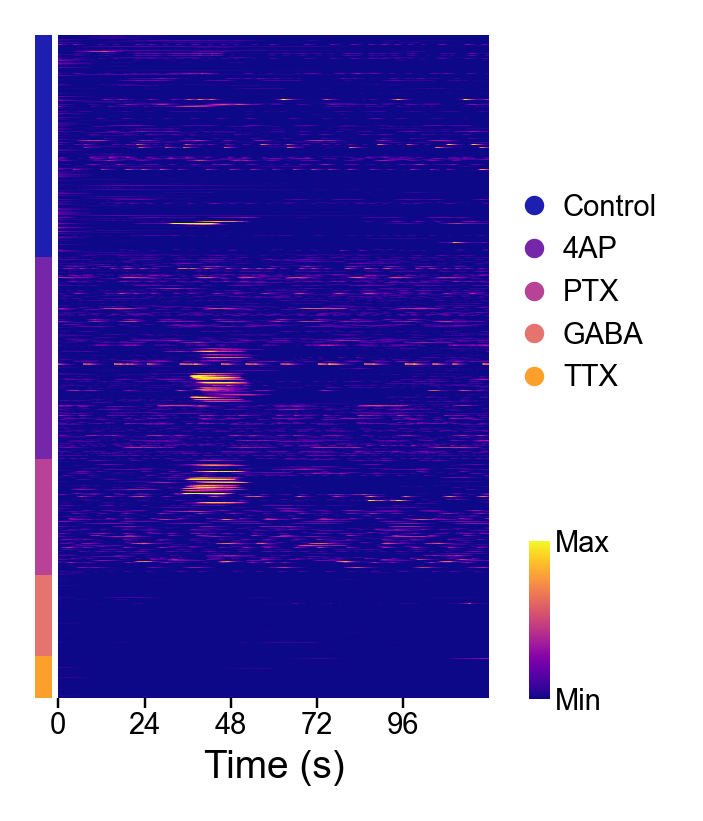

In [4]:
with plt.rc_context({"figure.dpi": (350)}):

    ax_heatmap = plot.heatmap(cell_properties_df=cell_properties_df[cell_properties_df.biological_replicate == 'JK003'],   imaging_interval=0.2,  cmap = 'plasma', palette = palette,minmax_bool=False, vmax=2, vmin=0.05)
    plt.savefig('Fig3/trace_heatmap_jk003.pdf',  bbox_inches='tight')

# Representative traces

[0.0, 250.0, 500.0]


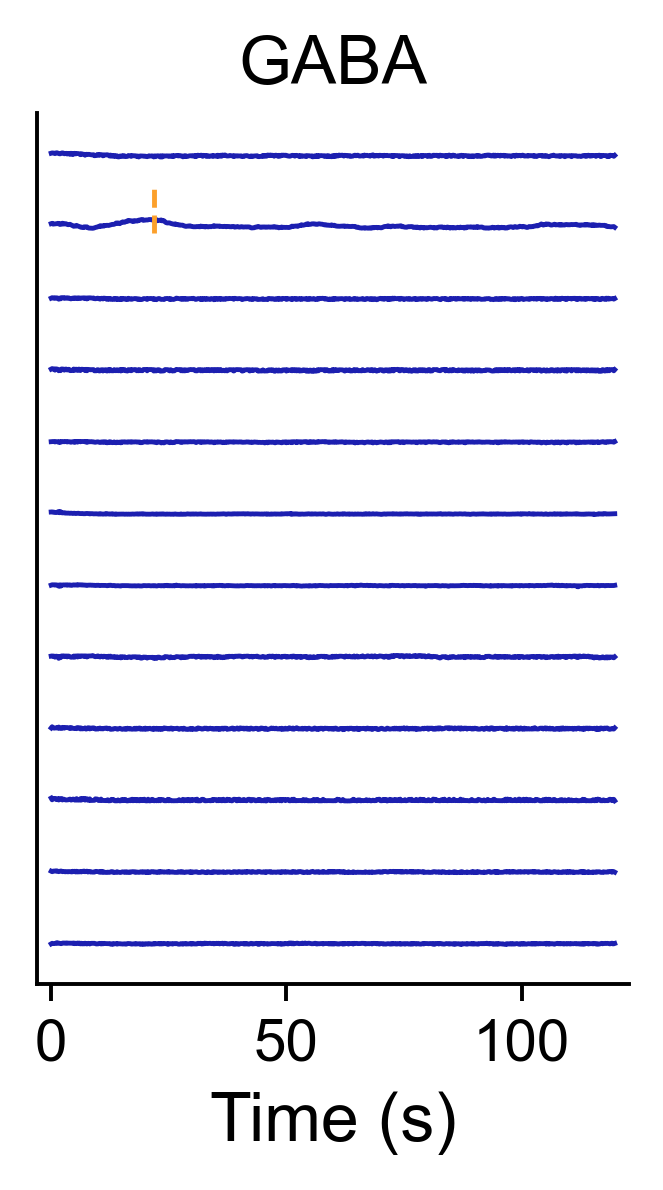

In [5]:
stimulation = 'GABA'
biological_replicate = 'JK003'
#df_stim = cell_properties_df[(cell_properties_df.stimulation == stimulation) & (cell_properties_df.biological_replicate == biological_replicate)].iloc[32:44]
df_stim = cell_properties_df[(cell_properties_df.stimulation == stimulation) & (cell_properties_df.biological_replicate == biological_replicate)].iloc[37:49]

traces = np.stack(df_stim['dff'].values)
peak_locations = df_stim['peak_location'].values

fig, ax = plt.subplots(figsize=(2, 3.5), dpi=350)

offset = 2.5  # Vertical offset between traces
for i, (trace, peaks) in enumerate(zip(traces, peak_locations)):
    y = trace + i * offset  # Apply vertical offset
    ax.plot(y, color='#1c1fb0', linewidth=1)
    ax.vlines(peaks, ymin=i * offset - 0.2, ymax=i * offset + 1.5, color='#fca02b', linestyle='--', linewidth=1)

ax.set_yticks([])  
ax.margins(x=0.025)    
plt.title(stimulation, fontsize=14)

xticks = list(ax.get_xticks())[1:-1]
print(xticks)
ax.set_xticks(xticks)
ax.set_xticklabels([int(x * 0.2) for x in xticks], fontsize=12)
ax.set_xlabel("Time (s)", fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('Fig3/GABA_representative_traces.pdf',  bbox_inches='tight')

# Active cells

In [6]:
active_cells_df.stimulation  = active_cells_df.stimulation.astype('category')
active_cells_df.stimulation = active_cells_df.stimulation.cat.reorder_categories(['Control', '4AP','PTX','GABA','TTX'])


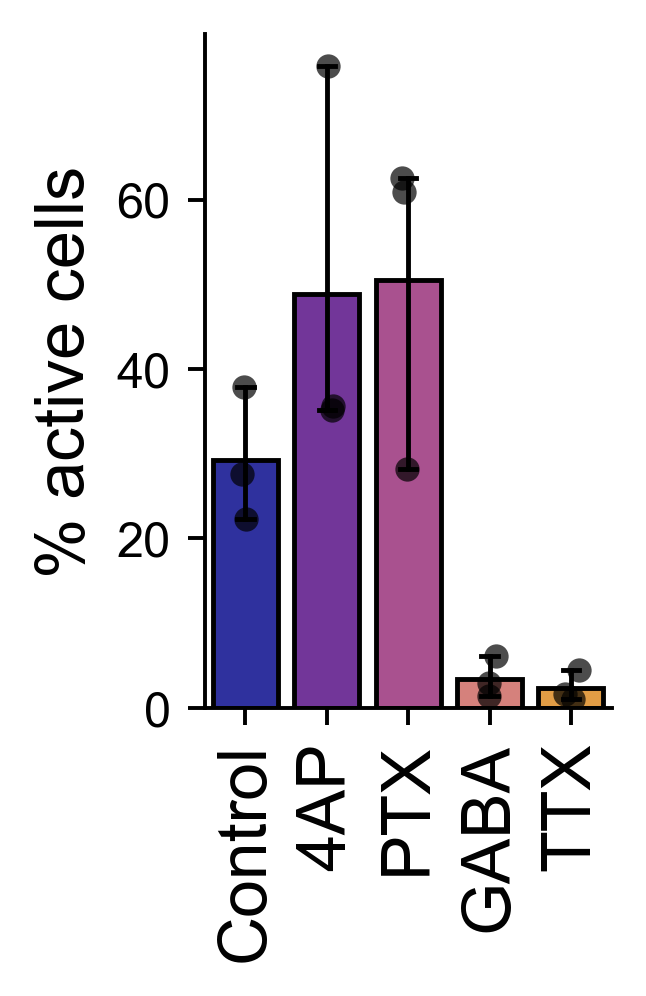

In [7]:
with plt.rc_context({"figure.dpi": (350), 'figure.figsize':(1.5, 2.5)}):

    ax = plot.all_conditions_barplot(dataframe=active_cells_df,palette=palette ,xcolumn='stimulation',ycolumn='proportion_active_cells')
    ax.get_legend().remove()
    plt.xticks(rotation = 90, fontsize=14)
    plt.xlabel('')
    plt.ylabel('% active cells', fontsize=14)
    plt.savefig('Fig3/active_cells_barplot.pdf',  bbox_inches='tight')
    

# Peak properties

In [8]:
# Read df with only active cells
cell_properties_df = pd.read_pickle('/Volumes/T9/Ca_data/exp_pharmacology/Analysis/cell_properties_spontaneous_active_cells.pkl')
palette = dict(cell_properties_df[['stimulation', 'colors']].drop_duplicates().values)

max_dff = []
for i, row in cell_properties_df.iterrows():
    max_dff.append(np.max(row['dff']))

cell_properties_df['max_dff'] = max_dff

cell_properties_df = cell_properties_df[cell_properties_df.max_dff < 5]


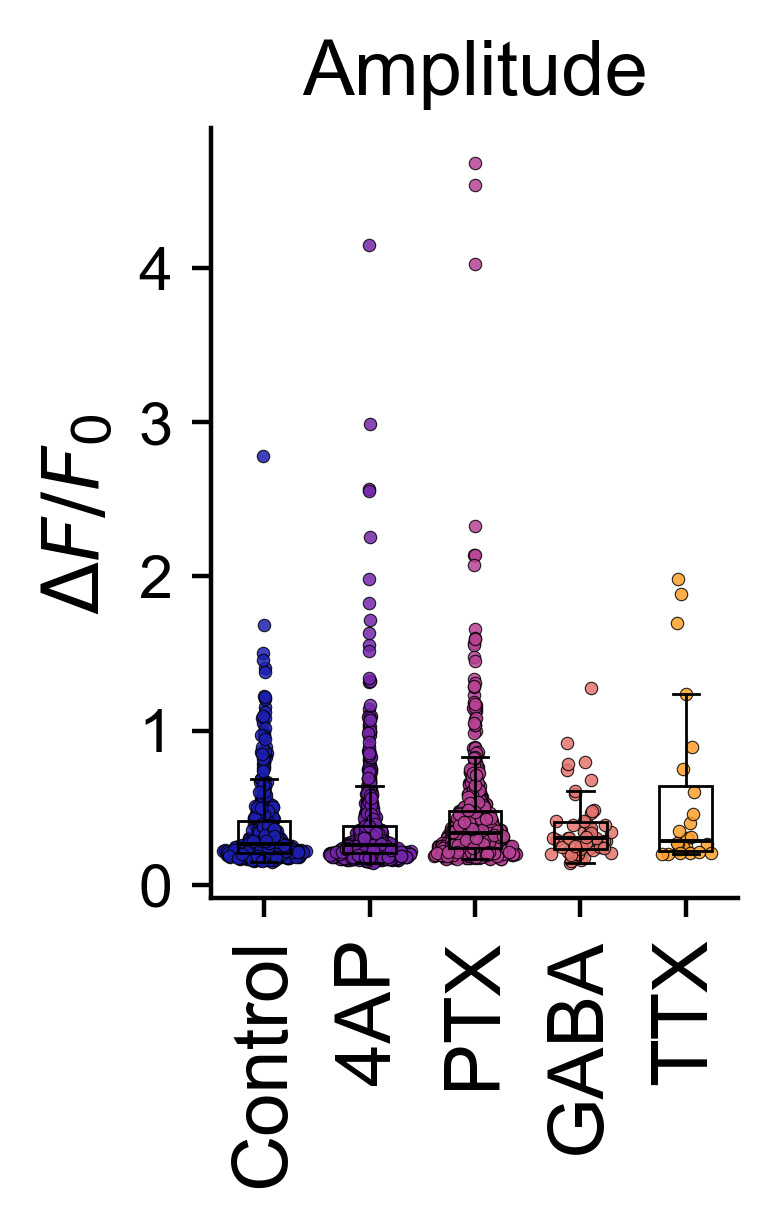

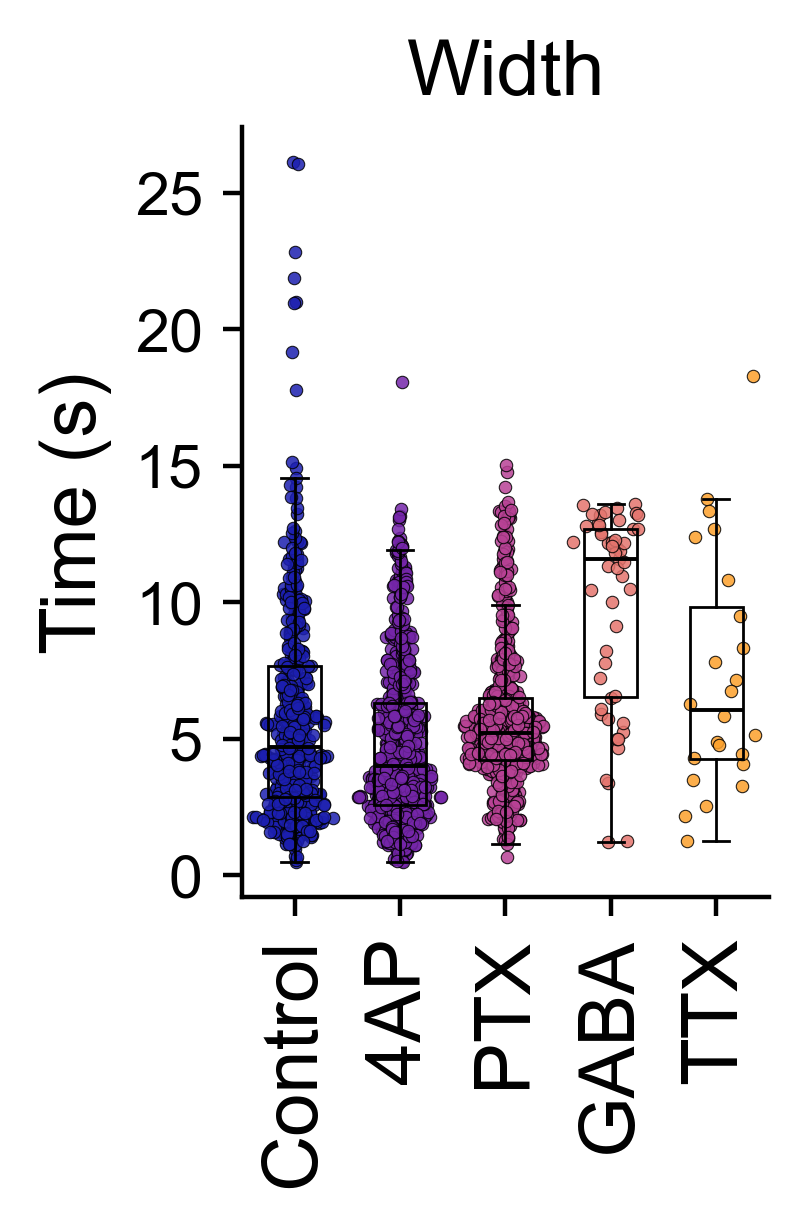

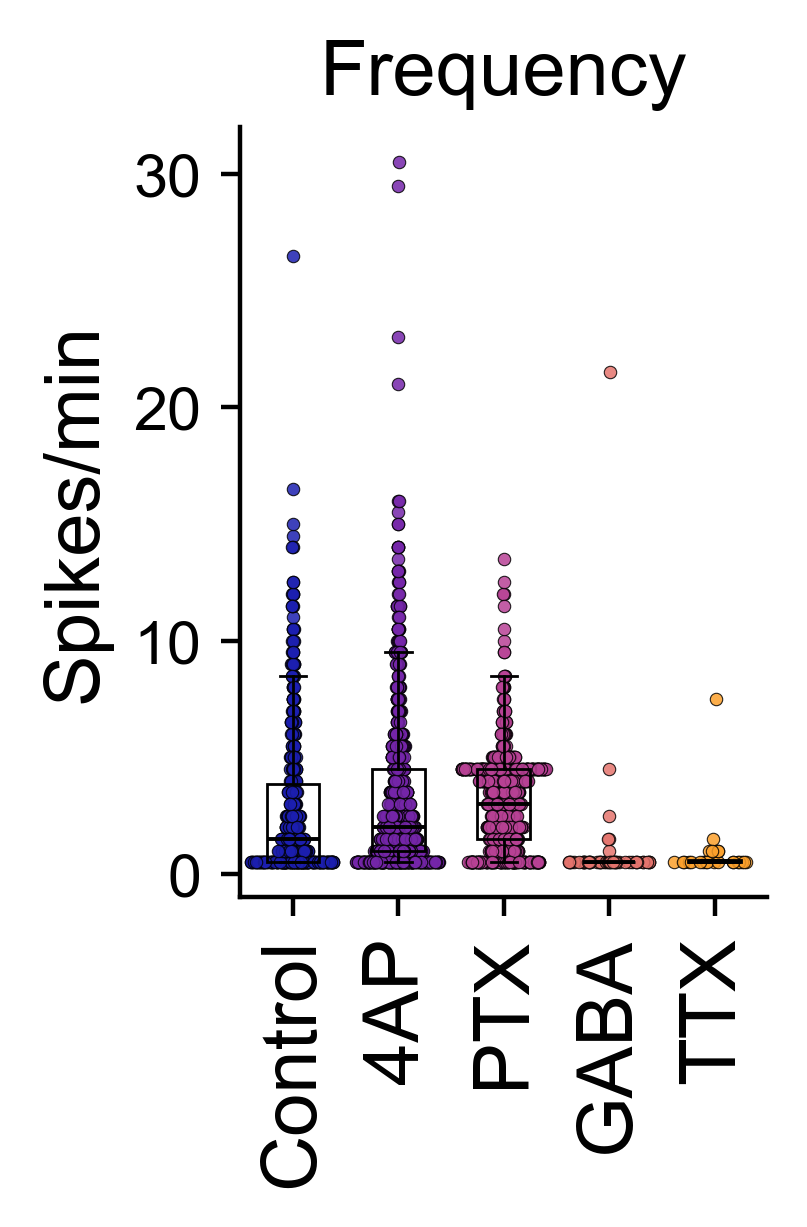

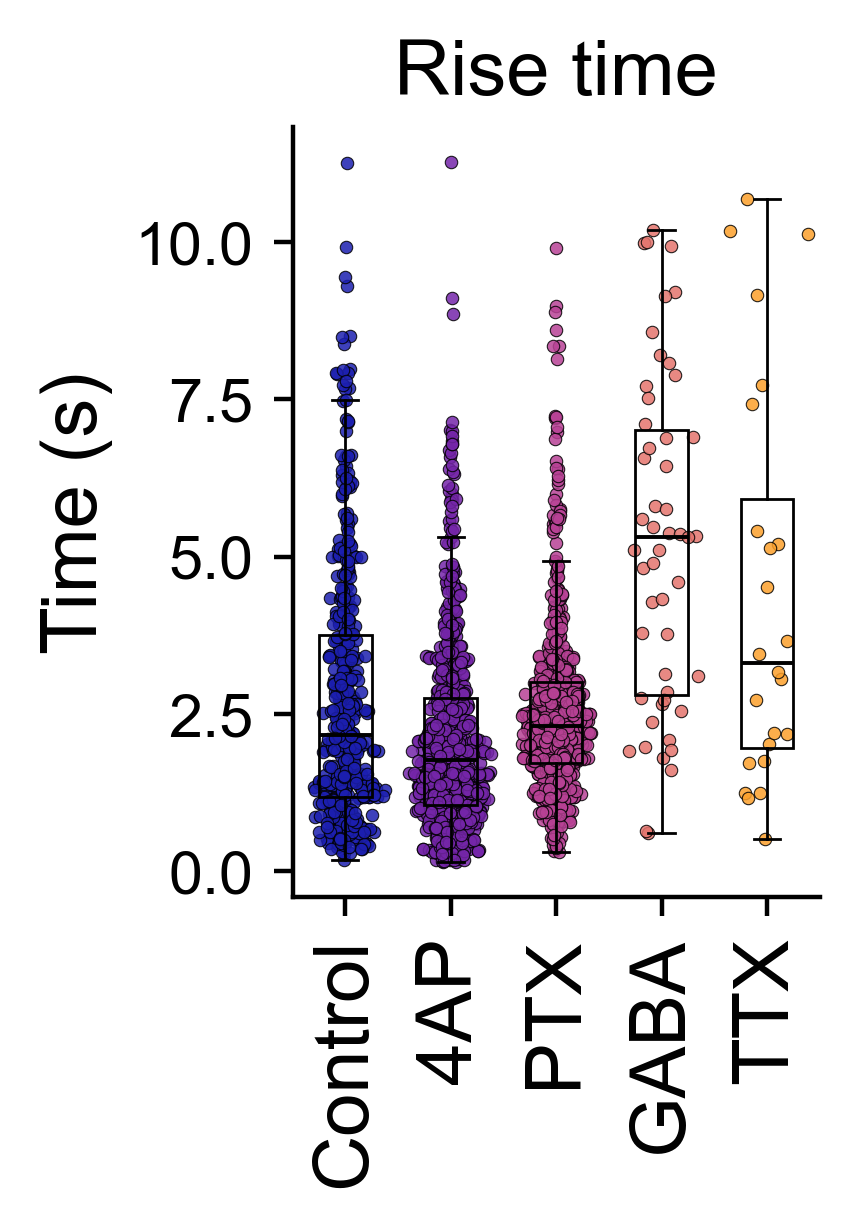

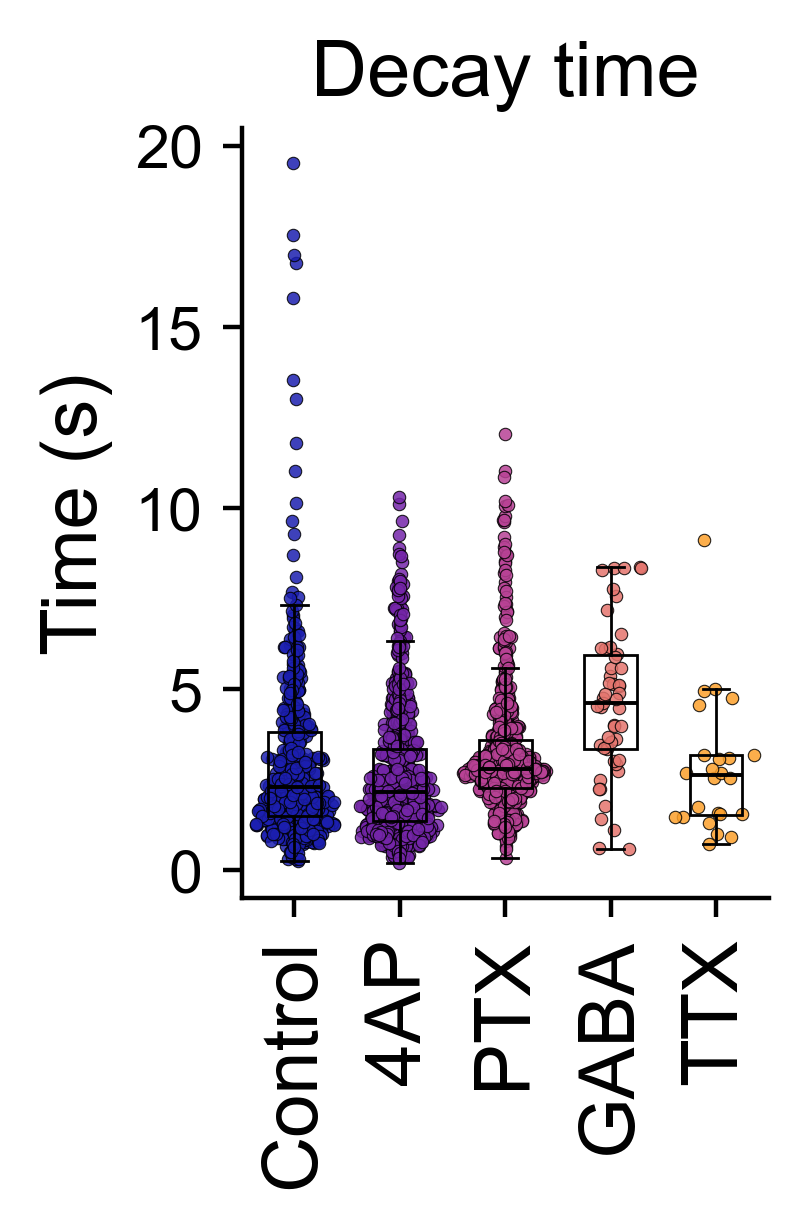

In [10]:
for property in ['amplitude','width', 'frequency', 'rise_time','decay_time']:
    ylabel_dict = {'amplitude': '$\Delta F/F_0$', 'prominence':'$\Delta F/F_0$', 'frequency':'Spikes/min', 'width':'Time (s)','rise_time':'Time (s)', 'decay_time':'Time (s)'}
    title_dict = {'amplitude': 'Amplitude','prominence':'Prominence', 'frequency':'Frequency', 'width':'Width','rise_time':'Rise time','decay_time':'Decay time'}
    with plt.rc_context({"figure.dpi": (400), 'figure.figsize':(1.7, 2.5)}):
    
        plot.beeswarm(cell_properties_df = cell_properties_df, control_condition = 'Control', palette=palette, y=property)
        plt.ylabel(ylabel_dict[property], fontsize=14)
        plt.title(title_dict[property], fontsize=14)
        plt.xticks(fontsize=14, rotation=90)
        plt.yticks(fontsize=11)
    plt.savefig(f'Fig3/swarmplot_{property}.pdf',  bbox_inches='tight')
    
    plt.show()

# PCA

[27-08-2025 11:44:44] [matplotlib.font_manager] [INFO] Fontsize %1.2f < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[27-08-2025 11:44:44] [matplotlib.font_manager] [INFO] Fontsize %1.2f < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[27-08-2025 11:44:44] [matplotlib.font_manager] [INFO] Fontsize %1.2f < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[27-08-2025 11:44:44] [matplotlib.font_manager] [INFO] Fontsize %1.2f < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
[27-08-2025 11:44:44] [matplotlib.font_manager] [INFO] Fontsize %1.2f < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


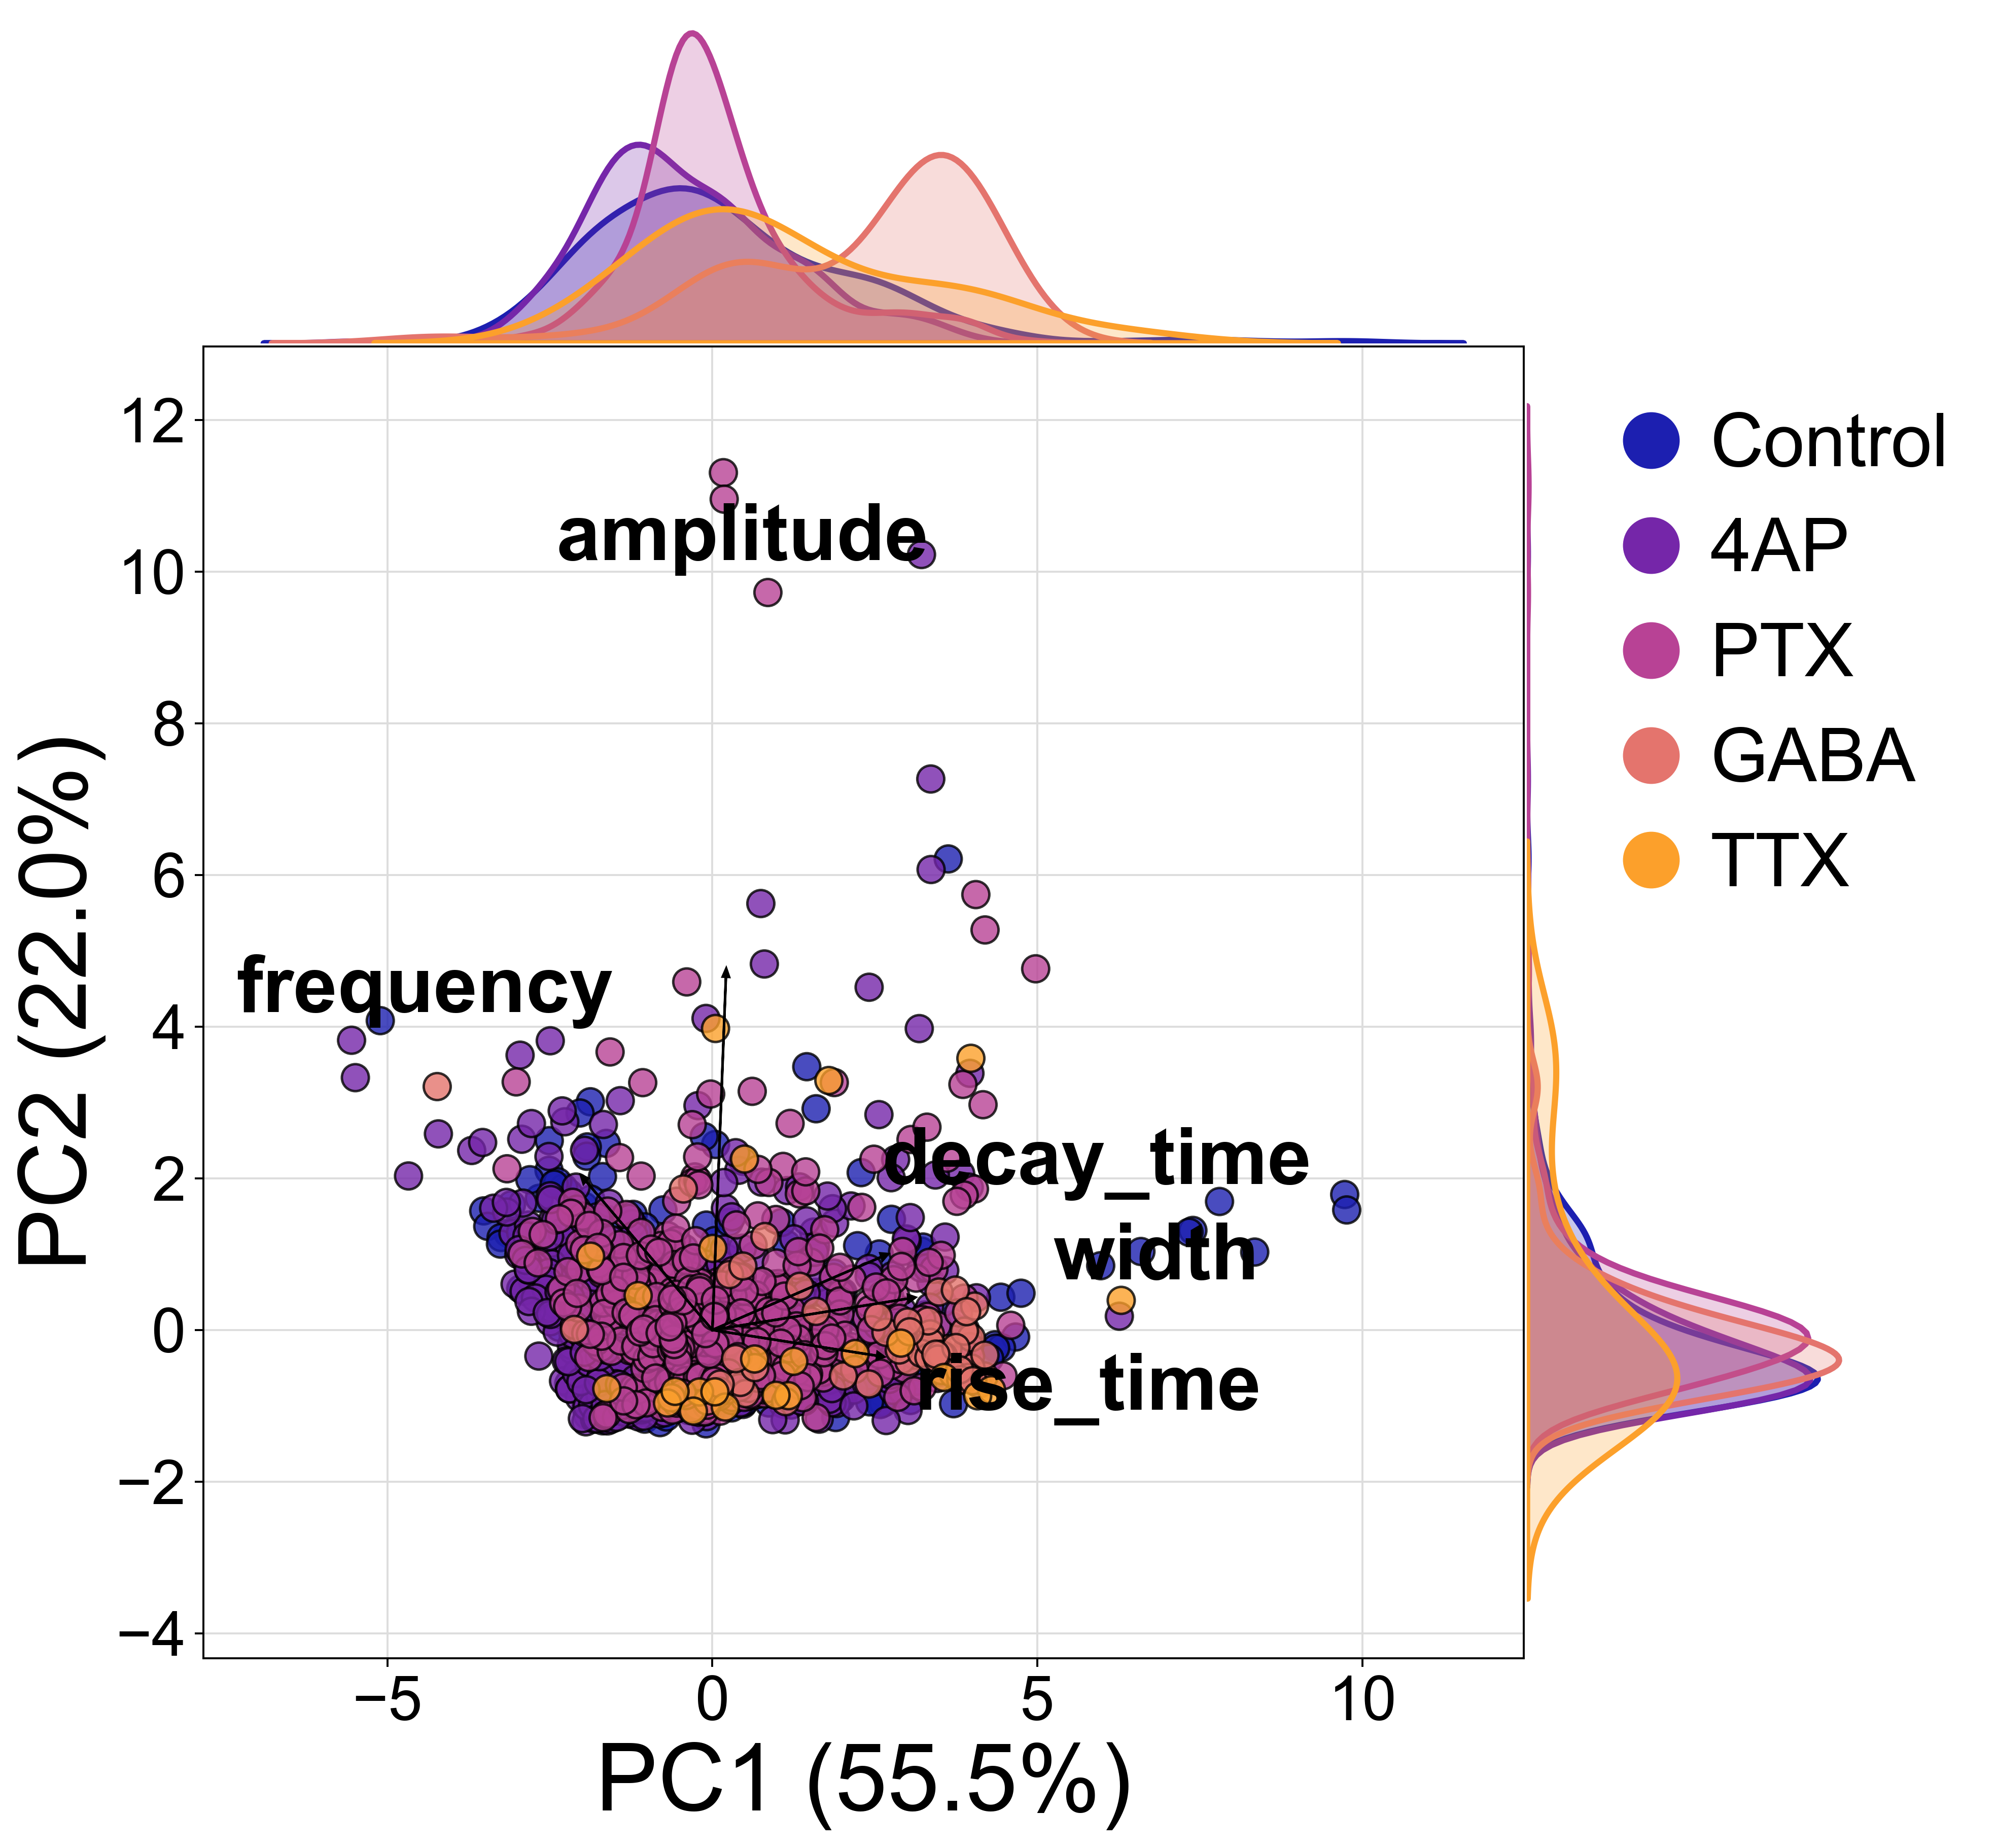

In [11]:

cell_properties_df = utils.scale_spike_properties(cell_properties_df = cell_properties_df)

ax_pca, cell_properties_df =plot.biplot(cell_properties_df = cell_properties_df, palette = palette)
ax_pca.tick_params(axis='x', labelsize=25)
ax_pca.tick_params(axis='y', labelsize=25)
plt.savefig(f'Fig3/pca.pdf',  bbox_inches='tight')



# Clustering the PCA space

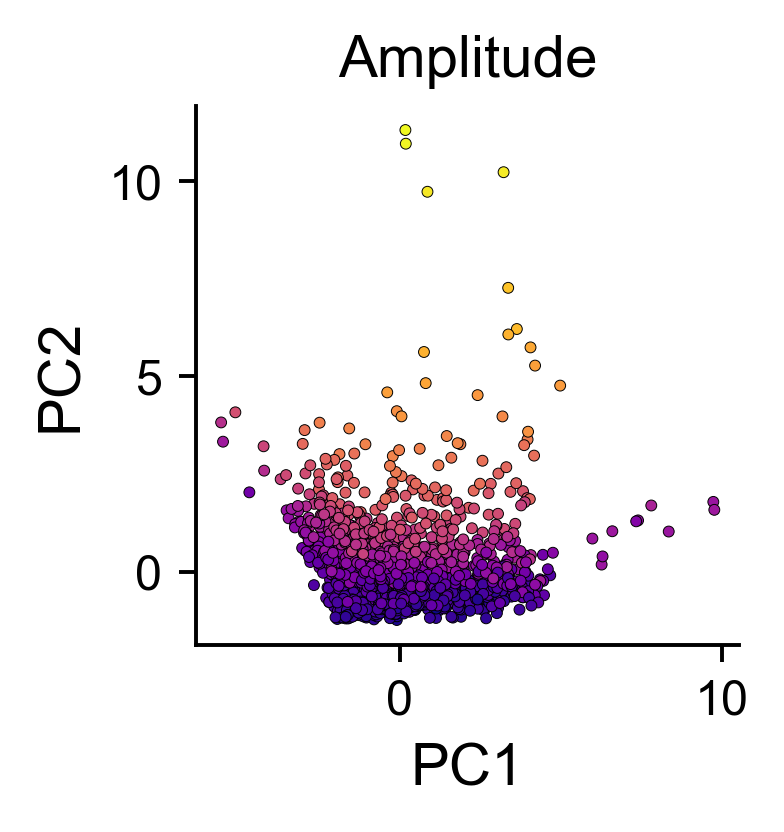

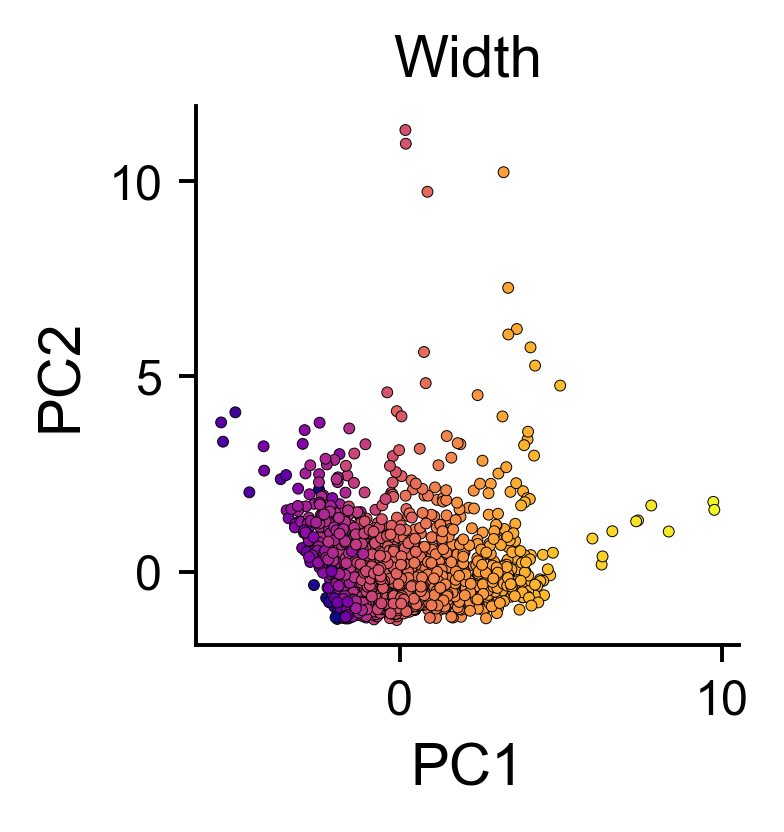

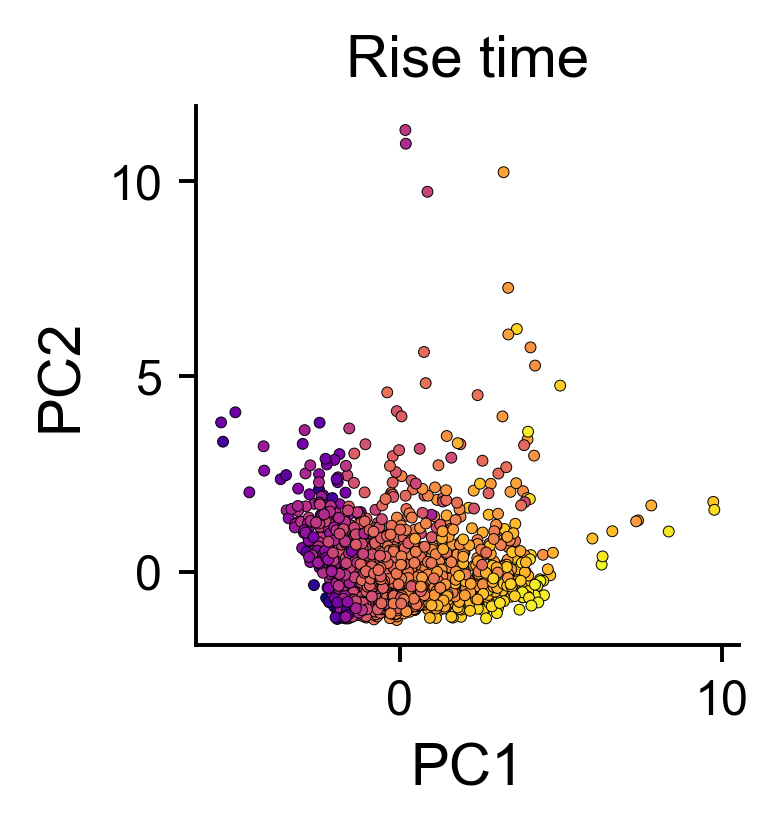

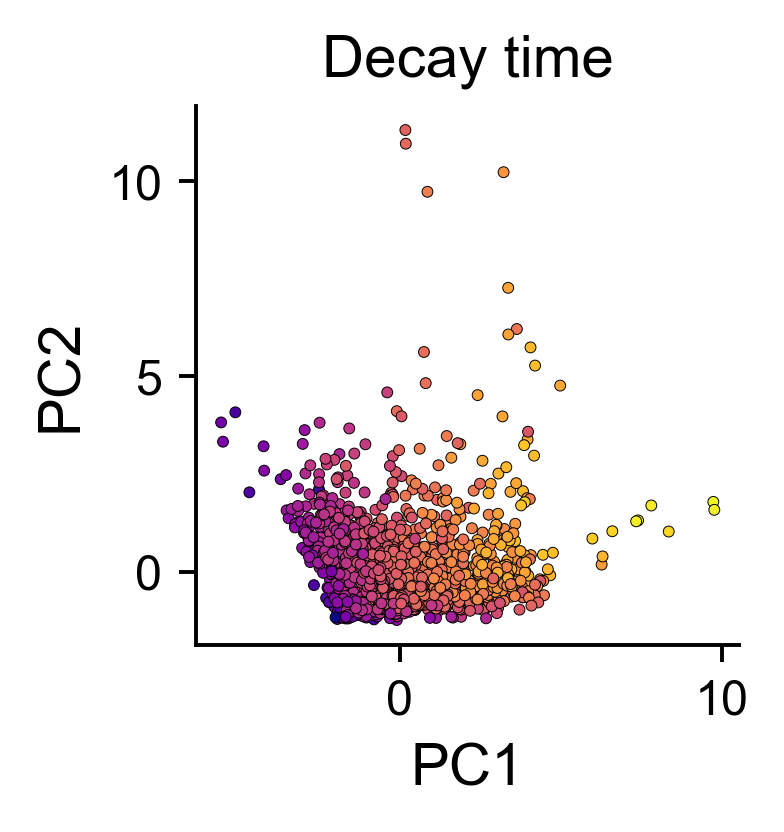

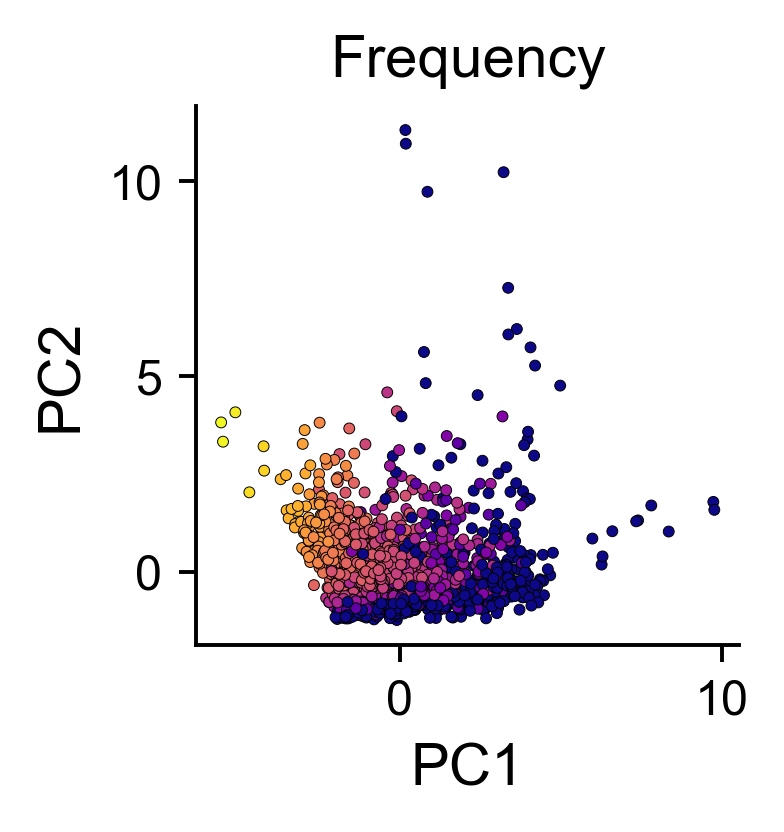

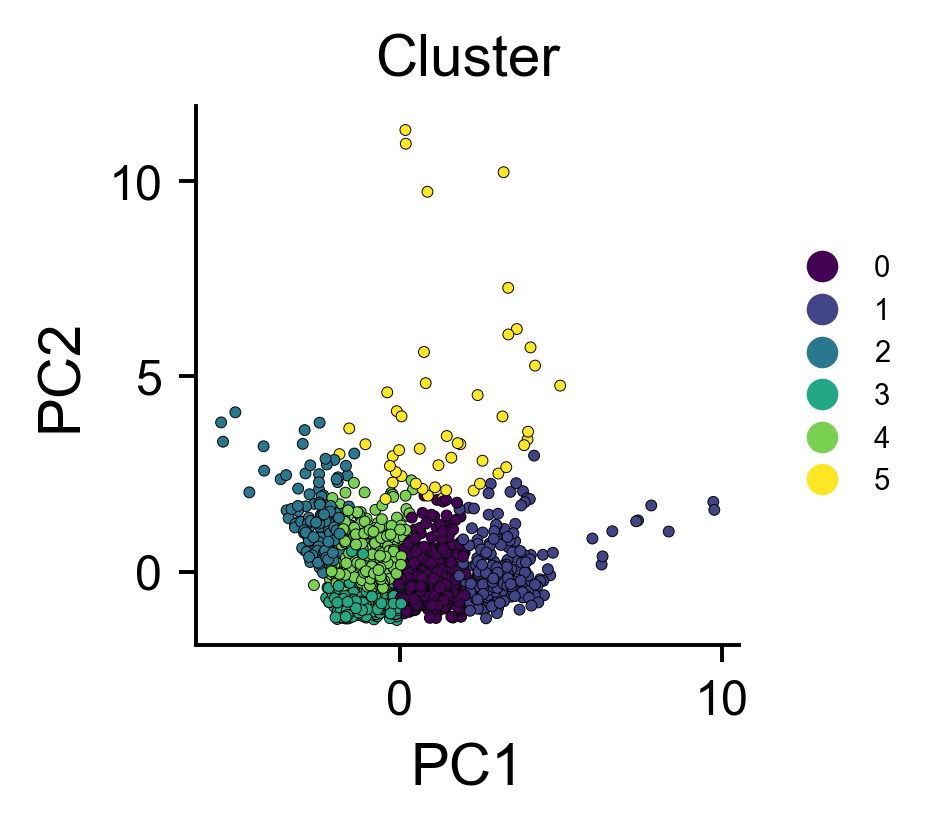

In [34]:
title_dict = {'amplitude': 'Amplitude','prominence':'Prominence', 'frequency':'Frequency', 'width':'Width','rise_time':'Rise time','decay_time':'Decay time', 'cluster':'Cluster'}

# Plot properties on beeswarm and on pca plot
for property in ['amplitude', 'width', 'rise_time', 'decay_time', 'frequency']:
    ax_pca_property = plot.pca_property(cell_properties_df = cell_properties_df, color_by = property)
    plt.title(title_dict[property])
    plt.savefig(f'Fig3/pca_scatter_{property}.pdf',  bbox_inches='tight')

ax_pca_property = plot.pca_property(cell_properties_df = cell_properties_df, color_by = 'cluster', cmap = 'viridis')
plt.title('Cluster')
plt.savefig(f'Fig3/pca_scatter_cluster.pdf',  bbox_inches='tight')



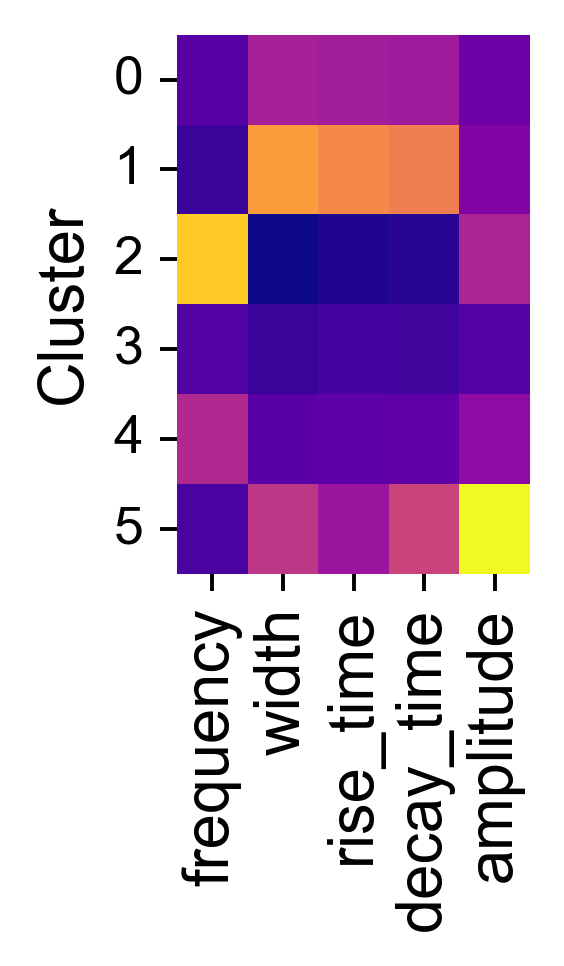

In [36]:
with plt.rc_context({"figure.dpi": (350), 'figure.figsize':(1.3, 2)}):

    plot.cluster_heatmap(cell_properties_df = cell_properties_df, vmax = 3)
    plt.savefig(f'Fig3/cluster_hetmap.pdf',  bbox_inches='tight')
    plt.show()
    

# Clustering barplot

In [37]:
cluster_percentages_df = (
    cell_properties_df[['stimulation','biological_replicate', 'cluster']].groupby(['stimulation', 'biological_replicate'])['cluster']
      .value_counts(normalize=True)
      .rename('percentage')
      .mul(100)
      .reset_index()
)

[15-08-2025 17:07:50] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[15-08-2025 17:07:50] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[15-08-2025 17:07:50] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[15-08-2025 17:07:50] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[15-08-2025 17:07:50] [matplotlib.ca

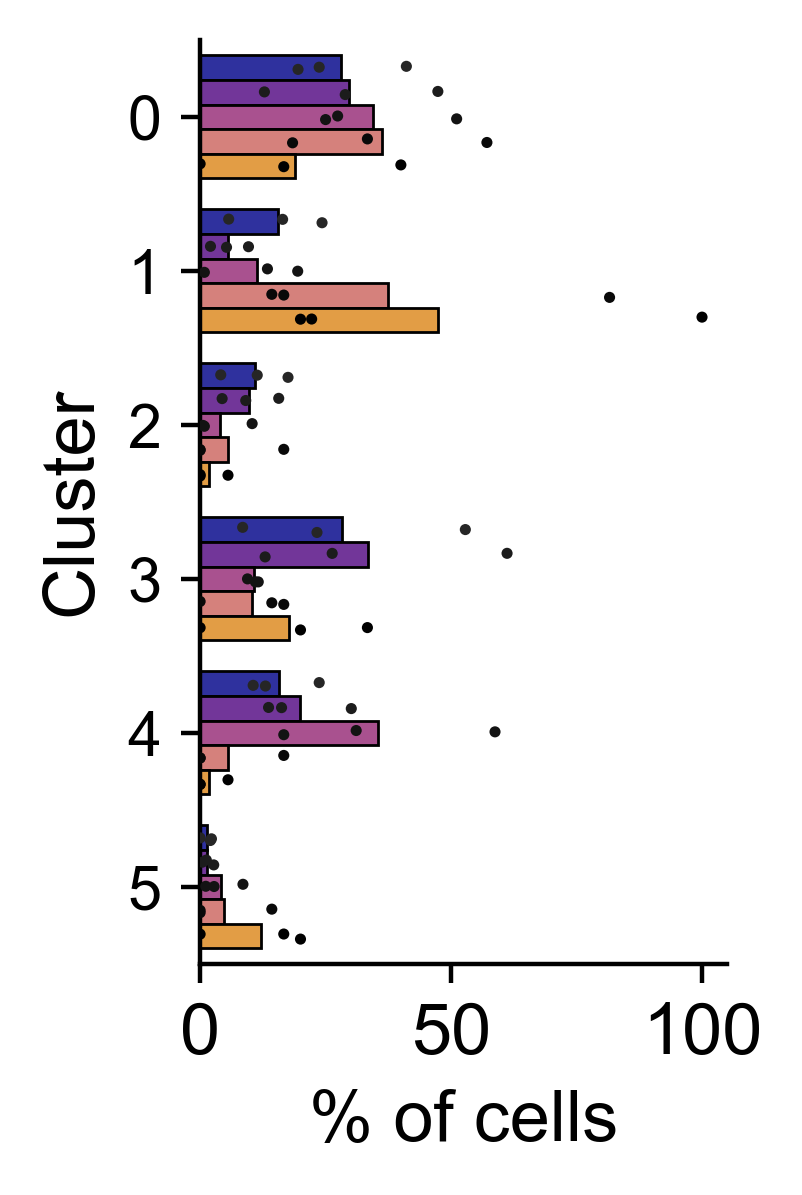

In [42]:
with plt.rc_context({"figure.dpi": 400}):
    fig, ax = plt.subplots(figsize=(1.7, 3))
    ax = sns.barplot(data=cluster_percentages_df, x='percentage', y='cluster', hue='stimulation', legend=None,palette=palette, ci=None, edgecolor='black', linewidth=0.5)
    sns.stripplot(data=cluster_percentages_df, x='percentage', y='cluster', hue='stimulation',  legend=None,ax=ax, color='black', dodge=True, size=2)
    
    ax.set_ylabel('Cluster', size=13)
    ax.set_xlabel('% of cells', size=13)
    
    plt.yticks(rotation=0, size=11)
    plt.xticks( size=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(f'Fig3/cluster_barplot.pdf',  bbox_inches='tight')
    plt.show()

# Segmentation pipeline performance test

In [13]:
# Number of ca recordings and respective runtime
n_recordings = np.array([7, 14, 28, 56, 70])
runtimes = np.array([144.3, 291.4, 598.7, 1175.3, 1475.1])

slope, intercept, r_value, p_value, std_err = stats.linregress(n_recordings,runtimes)

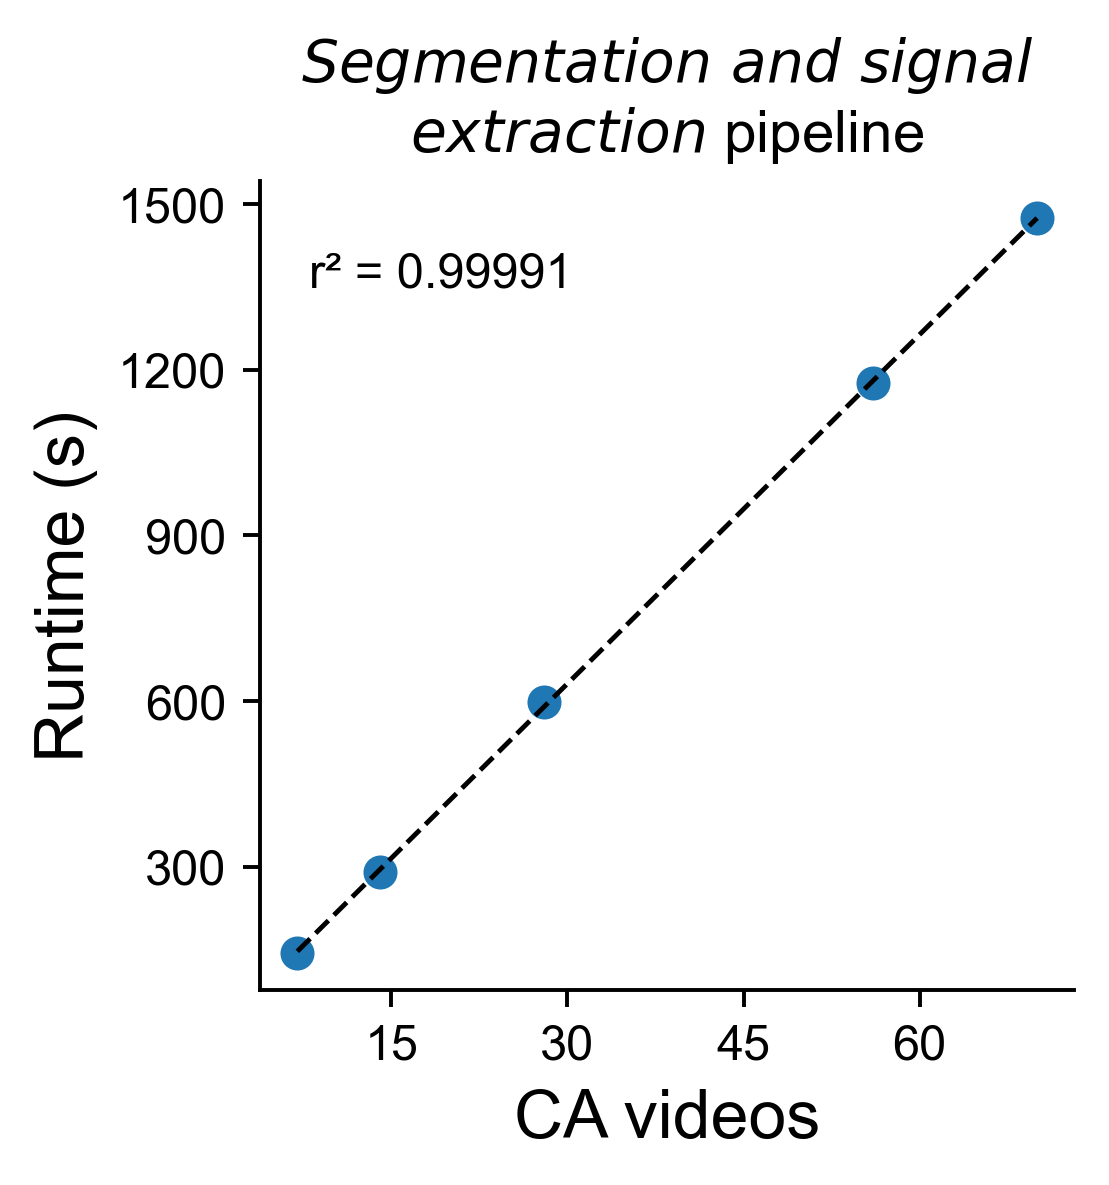

In [15]:
fig, ax = plt.subplots(figsize=(3,3), dpi=350)

ax.scatter(n_recordings, runtimes)

plt.plot(n_recordings, intercept + slope*n_recordings, color="black", lw=1, ls='--')

# Plot the line
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.xlabel('CA videos', fontsize=14)
plt.ylabel('Runtime (s)', fontsize=14)
plt.text(8, 1350, f'r\N{SUPERSCRIPT TWO} = {round(r_value**2,5)}')

plt.title(r'$\it{Segmentation\ and\ signal}$' + '\n' + '$\it{extraction}$ pipeline')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('Fig/segmentation_extraction_performance.pdf', bbox_inches='tight')

# Single cell analysis pipeline

In [16]:
# Number of ca recordings and respective runtime
n_recordings = np.array([7, 14, 28, 56, 70])
runtimes = np.array([37, 64.4, 146.5, 283.4, 340.3])

slope, intercept, r_value, p_value, std_err = stats.linregress(n_recordings,runtimes)

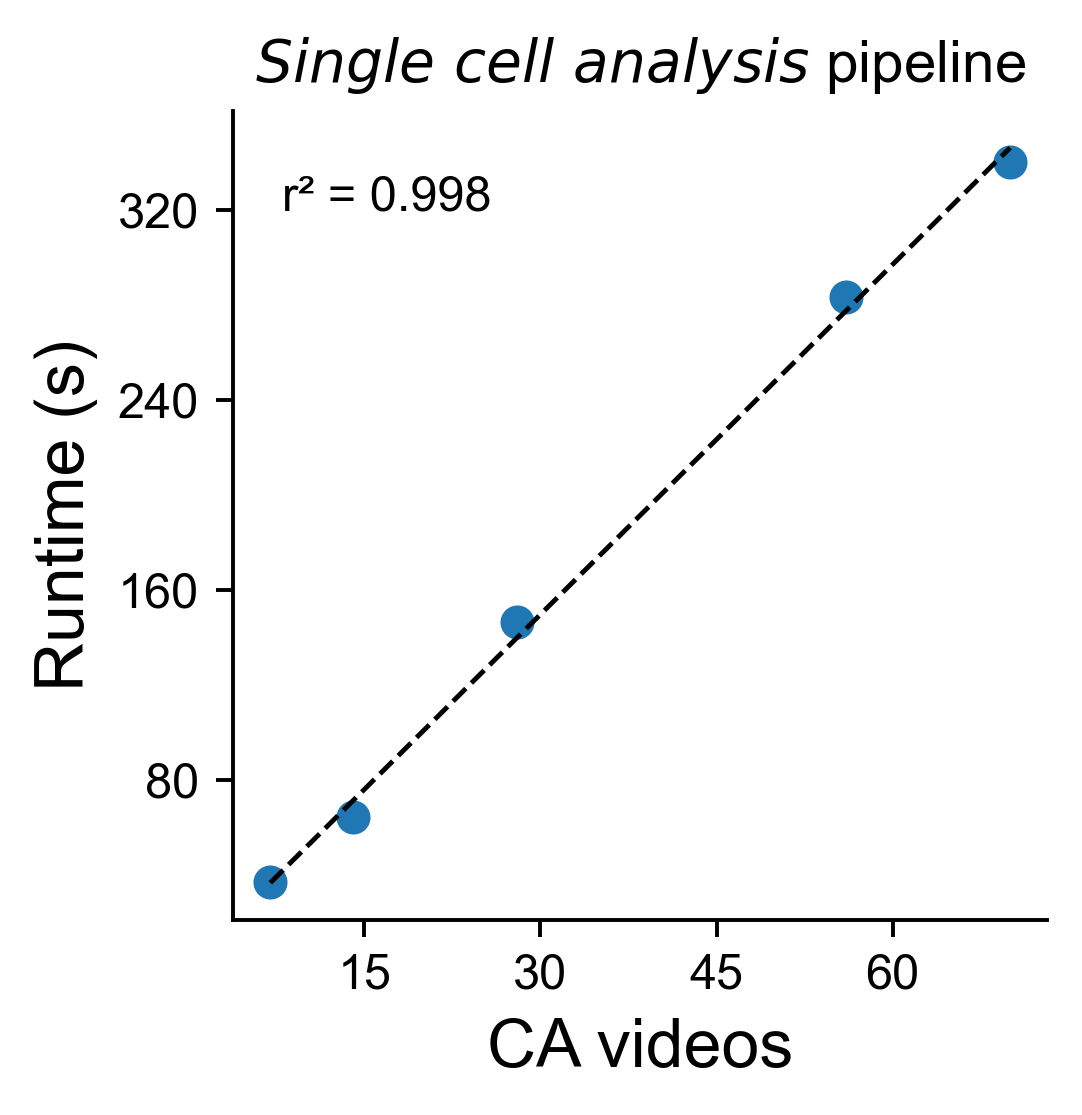

In [18]:
fig, ax = plt.subplots(figsize=(3,3), dpi=350)

ax.scatter(n_recordings, runtimes)

plt.plot(n_recordings, intercept + slope*n_recordings, color="black", lw=1, ls='--')

# Plot the line
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.xlabel('CA videos', fontsize=14)
plt.ylabel('Runtime (s)', fontsize=14)
plt.text(8, 320, f'r\N{SUPERSCRIPT TWO} = {round(r_value**2,3)}')

plt.title(r'$\it{Single\ cell\ analysis}$ pipeline')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('Fig/single_cell_analysis_performance.pdf', bbox_inches='tight')